In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the CSV file into a Pandas DataFrame
data = pd.read_csv('datasets/subreddit_data.csv')

In [3]:
data

,Subreddit,Title,Body/Text,Author,Score,Creation Time,Number of Comments,URL,Flair,Upvotes,Downvotes,Upvote Ratio
0,mentalhealth,I hate going outside.,Summer is here in my city and i've not been do...,caledenx,2,2023-06-03 17:59:54,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,2,0,1.00
1,mentalhealth,How do I be myself around people that I haven'...,I've always been a shy person. A bit more intr...,bradtohostmemereview,1,2023-06-03 17:58:50,0,https://www.reddit.com/r/mentalhealth/comments...,Need Support,1,0,1.00
2,mentalhealth,I've let my problems get the better of me,I've had a fuxked up past. Parents abusive of ...,coffeeanddissociate,1,2023-06-03 17:56:11,0,https://www.reddit.com/r/mentalhealth/comments...,Venting,1,0,1.00
3,mentalhealth,Finally trying to get back on track,"This past weekend, I had one of the most inten...",YourParadise98,1,2023-06-03 17:51:18,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
4,mentalhealth,Residential treatment,I’m going to be staying at a residential facil...,Commission-Exact,1,2023-06-03 17:47:17,0,https://www.reddit.com/r/mentalhealth/comments...,NaN,1,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
74183,ADHDsupport,First few days on 27mg Concerta and hating it,I need some advice. I'm 30 years old and was j...,Danger_17,2,2014-10-07 15:27:27,2,https://www.reddit.com/r/ADHDSupport/comments/...,NaN,2,0,1.00
74184,ADHDsupport,Android Phone? Google Keep,NaN,rabidbob,3,2014-09-09 04:05:37,0,http://www.reddit.com/r/ADHD/comments/2fu4iw/f...,NaN,3,0,1.00
74185,ADHDsupport,Lionflower13's 5 every day things for success ...,NaN,rabidbob,2,2014-09-09 04:02:44,0,http://www.reddit.com/r/ADHD/comments/2fq446/f...,NaN,2,0,1.00
74186,ADHDsupport,The Secret Weapon: Evernote as an organisation...,NaN,rabidbob,3,2014-09-09 03:52:54,4,http://www.thesecretweapon.org/,NaN,2,1,0.81


In [4]:
data.shape

(74188, 12)

In [5]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Drop duplicate rows if necessary
data.drop_duplicates(inplace=True)
print("Data shape after dropping duplicate values:", data.shape)

Number of duplicate rows: 372
Data shape after dropping duplicate values: (73816, 12)


In [6]:
# Drop rows with null values in 'Title' or 'Body/Text' columns
data.dropna(subset=['Title', 'Body/Text'], inplace=True)
print("Data shape after dropping null values:", data.shape)

Data shape after dropping null values: (63136, 12)


In [7]:
# Step 1: Text Cleaning
data['Title'] = data['Title'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x)))
data['Body/Text'] = data['Body/Text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x)))

In [8]:
# Step 2: Lowercasing
data['Title'] = data['Title'].apply(lambda x: x.lower())
data['Body/Text'] = data['Body/Text'].apply(lambda x: x.lower())

In [9]:
# Step 3: Tokenization
data['Title'] = data['Title'].apply(lambda x: x.split())
data['Body/Text'] = data['Body/Text'].apply(lambda x: x.split())

In [10]:
# Step 4: Stopword Removal
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
data['Body/Text'] = data['Body/Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
print("Data shape after stopword removal:", data.shape)

Data shape after stopword removal: (63136, 12)


In [11]:
# Step 5: Lemmatization
lemmatizer = WordNetLemmatizer()
data['Title'] = data['Title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data['Body/Text'] = data['Body/Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print("Data shape after lemmatization:", data.shape)

Data shape after lemmatization: (63136, 12)


In [12]:
# Step 6: Removing Noise
data['Title'] = data['Title'].apply(lambda x: ' '.join(x))
data['Body/Text'] = data['Body/Text'].apply(lambda x: ' '.join(x))
print("Data shape after removing noise:", data.shape)

Data shape after removing noise: (63136, 12)


In [13]:
# Step 7: Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
title_tfidf = vectorizer.fit_transform(data['Title'])
body_tfidf = vectorizer.fit_transform(data['Body/Text'])

In [14]:
# Step 8: Data Preview
print(data.head())
print("Title TF-IDF shape:", title_tfidf.shape)
print("Body/Text TF-IDF shape:", body_tfidf.shape)

      Subreddit                           Title  \
0  mentalhealth              hate going outside   
1  mentalhealth  around people known least year   
2  mentalhealth          let problem get better   
3  mentalhealth   finally trying get back track   
4  mentalhealth           residential treatment   

                                           Body/Text                Author  \
0  summer city well mentally nurse work hr shift ...              caledenx   
1  always shy person bit introverted extroverted ...  bradtohostmemereview   
2  fuxked past parent abusive childhood neglect s...   coffeeanddissociate   
3  past weekend one intense mental breakdown sinc...        YourParadise98   
4  going staying residential facility day activit...      Commission-Exact   

   Score        Creation Time  Number of Comments  \
0      2  2023-06-03 17:59:54                   0   
1      1  2023-06-03 17:58:50                   0   
2      1  2023-06-03 17:56:11                   0   
3      1  20

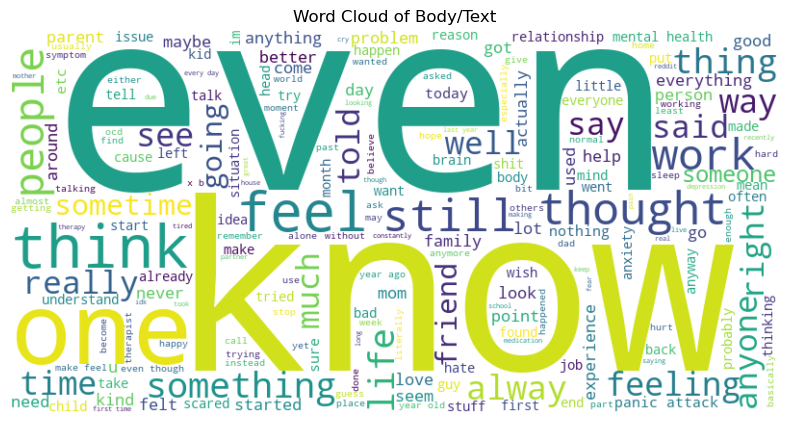

In [15]:
# Graph 1: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Body/Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Body/Text')
plt.show()

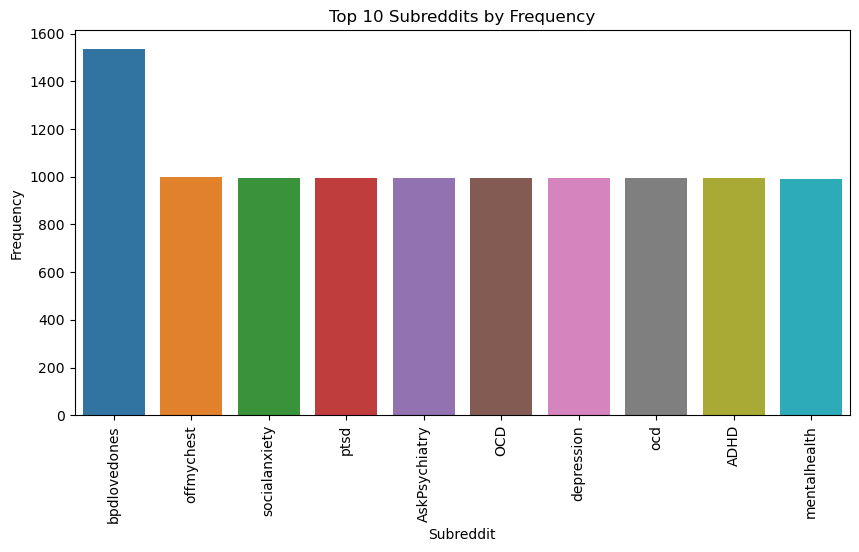

In [16]:
# Graph 2: Bar Plot of Subreddit Frequencies
subreddit_counts = data['Subreddit'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.title('Top 10 Subreddits by Frequency')
plt.show()

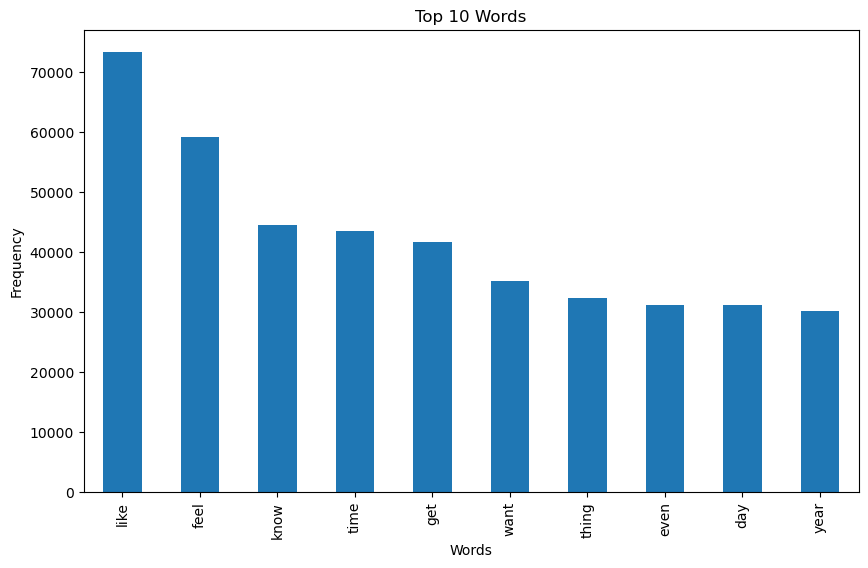

In [17]:
# Graph 3: Bar Plot of Top 10 words Frequencies

# Calculate word frequencies
word_frequencies = data['Body/Text'].str.split(expand=True).stack().value_counts()

# Plot the top N words
N = 10  # Number of top words to plot
top_words = word_frequencies.head(N)
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {N} Words')
plt.show()

In [18]:
# Save preprocessed data to a new CSV file
preprocessed_data_file = 'datasets/preprocessed_data.csv'
data.to_csv(preprocessed_data_file, index=False)

# Print success message
print(f"Preprocessed data saved to: {preprocessed_data_file}")

Preprocessed data saved to: datasets/preprocessed_data.csv
